# HW2
Kevin Smith & Evelina Teran

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

abalone_data = pd.read_csv('/Users/kevin_smith/Desktop/FSU_Relevant_Stuff/spring23/STA5635/homework/hw2/abalone.csv')

In [2]:
# Split data into predictors and response variables
X = abalone_data.iloc[:, :7]
y = abalone_data.iloc[:, -1]

# Number of random splits
num_splits = 20

## Code for Question 1
# Create a list to store the MSE values for training and testing sets
train_mse_list = []
test_mse_list = []

for _ in range(num_splits):
  # Random split 
  X_train, X_test, y_train, y_test = train_test_split(X, 
                      y,
                      test_size = 0.1, 
                      random_state = np.random.randint(1,100))

  # Calculate average training y
  avg_train_y = np.mean(y_train)

  # Predict test set responses using average training y
  y_pred_train = np.full_like(y_train, avg_train_y)
  y_pred_test = np.full_like(y_test, avg_train_y)

  # Calculate MSE
  train_mse = mean_squared_error(y_train, y_pred_train)
  test_mse = mean_squared_error(y_test, y_pred_test)

  # Append MSE values to lists
  train_mse_list.append(train_mse)
  test_mse_list.append(test_mse)


# Calculate average MSE for training and testing sets across the 20 splits
avg_null_train_mse = np.mean(train_mse_list)
avg_null_test_mse = np.mean(test_mse_list)

print(f"Average training MSE for Null Model: {avg_null_train_mse}")
print(f"Average testing MSE for Null Model: {avg_null_test_mse}")

Average training MSE for Null Model: 11.206506120276742
Average testing MSE for Null Model: 11.727153110047848


## Question 2

In [3]:
# Create a list to store metrics
train_r2_list, test_r2_list = [], []
train_mse_list, test_mse_list = [], []
log_det_list = []

for _ in range(num_splits):
  # Random split 
  X_train, X_test, y_train, y_test = train_test_split(X,
                      y,
                      test_size = 0.1,
                      random_state = np.random.randint(1,100))

  # Perform Ridge Regression
  lambda_value = 0.001
  XTX_plus_lambdaIp = np.dot(X_train.T, X_train) + lambda_value * np.identity(X_train.shape[1])

  ridge_weights = np.linalg.solve(XTX_plus_lambdaIp, np.dot(X_train.T, y_train))

  # Model Evaluation
  y_pred_train = np.dot(X_train, ridge_weights)
  y_pred_test = np.dot(X_test, ridge_weights)

  train_r2 = r2_score(y_train, y_pred_train)
  test_r2 = r2_score(y_test, y_pred_test)

  train_mse = mean_squared_error(y_train, y_pred_train)
  test_mse = mean_squared_error(y_test, y_pred_test)

  # Calculate Log Determinant 
  log_det = np.log(np.linalg.det(XTX_plus_lambdaIp))

  # Append metrics to lists
  train_r2_list.append(train_r2)
  test_r2_list.append(test_r2)
  train_mse_list.append(train_mse)
  test_mse_list.append(test_mse)
  log_det_list.append(log_det)


# Calculate average and standard deviation for metrics
avg_train_r2 = np.mean(train_r2_list)
std_train_r2 = np.std(train_r2_list)

avg_test_r2 = np.mean(test_r2_list)
std_test_r2 = np.std(test_r2_list)

avg_train_mse = np.mean(train_mse_list)
std_train_mse = np.std(train_mse_list)

avg_test_mse = np.mean(test_mse_list)
std_test_mse = np.std(test_mse_list)

avg_log_det = np.mean(log_det_list)
std_log_det = np.std(log_det_list)

# Print results
print(f"Average Training R^2: {avg_train_r2}, Std Training R^2: {std_train_r2}")
print(f"Average Testing R^2: {avg_test_r2}, Std Testing R^2: {std_test_r2}")
print(f"Average Training MSE: {avg_train_mse}, Std Training MSE: {std_train_mse}")
print(f"Average Testing MSE: {avg_test_mse}, Std Testing MSE: {std_test_mse}")
print(f"Average Log Determinant: {avg_log_det}, Std Log Determinant: {std_log_det}")

Average Training R^2: 0.5125645787609263, Std Training R^2: 0.004308612628212074
Average Testing R^2: 0.5238960466683833, Std Testing R^2: 0.0403581722774708
Average Training MSE: 5.050367976968313, Std Training MSE: 0.07288960676216223
Average Testing MSE: 5.023363245432512, Std Testing MSE: 0.6642493605933701
Average Log Determinant: 18.290646036857108, Std Log Determinant: 0.06540525467986825


## Question 3

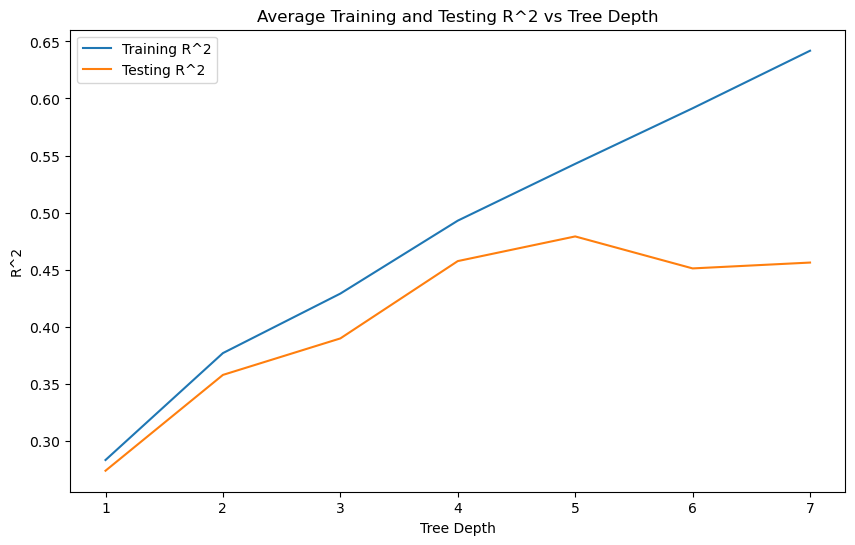

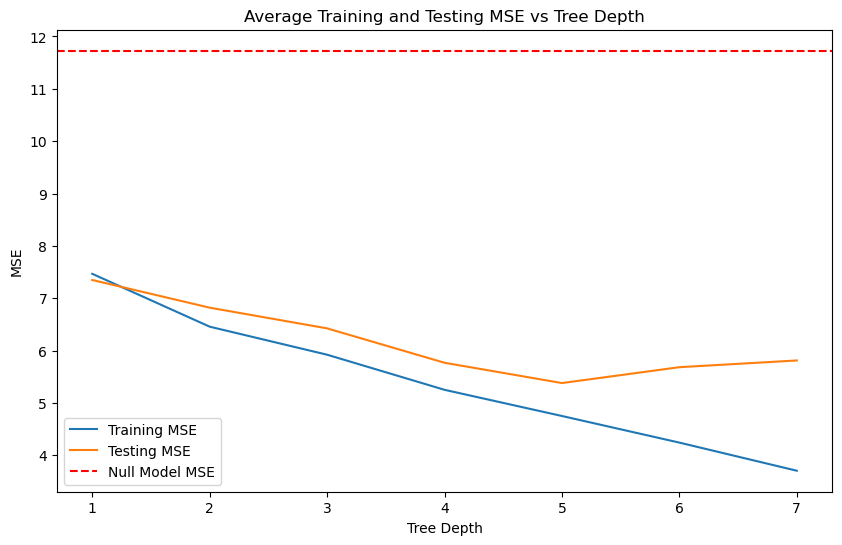

In [4]:
max_depths = range(1,8)

# List to store metrics
train_r2_avg, test_r2_avg = [], []
train_mse_avg, test_mse_avg = [], []

null_model_mse = avg_null_test_mse

for depth in max_depths:
  train_r2_list, test_r2_list = [], []
  train_mse_list, test_mse_list = [], []

  for _ in range(num_splits):
    # Random Split
    X_train, X_test, y_train, y_test = train_test_split(X,
                      y,
                      test_size=0.1,
                      random_state=np.random.randint(1,100))

    # Decision Tree Regression
    dt_model = DecisionTreeRegressor(max_depth=depth)
    dt_model.fit(X_train, y_train)

    # Model Evaluation
    y_pred_train = dt_model.predict(X_train)
    y_pred_test = dt_model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    # Append metrics
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

  # Calculate average metric for current tree depth
  avg_train_r2 = np.mean(train_r2_list)
  avg_test_r2 = np.mean(test_r2_list)
  avg_train_mse = np.mean(train_mse_list)
  avg_test_mse = np.mean(test_mse_list)

  # Append average metrics to lists
  train_r2_avg.append(avg_train_r2)
  test_r2_avg.append(avg_test_r2)
  train_mse_avg.append(avg_train_mse)
  test_mse_avg.append(avg_test_mse)

# Plot R^2 vs Tree Depth
plt.figure(figsize= (10,6))
plt.plot(max_depths, train_r2_avg, label="Training R^2")
plt.plot(max_depths, test_r2_avg, label="Testing R^2")
plt.xlabel("Tree Depth")
plt.ylabel("R^2")
plt.title("Average Training and Testing R^2 vs Tree Depth")
plt.legend()
plt.savefig("r2_vs_depth.png")

# Plot MSE vs Tree Depth with Null Model MSE as a horizontal line
plt.figure(figsize= (10,6))
plt.plot(max_depths, train_mse_avg, label="Training MSE")
plt.plot(max_depths, test_mse_avg, label="Testing MSE")
plt.axhline(y=null_model_mse, color='r', linestyle='--', label="Null Model MSE")
plt.xlabel("Tree Depth")
plt.ylabel("MSE")
plt.title("Average Training and Testing MSE vs Tree Depth")
plt.legend()
plt.savefig("MSE_vs_depth.png")

## Question 4

In [5]:
num_trees_list = [10, 30, 100, 300]

# Lists to store results
results = {}

for num_trees in num_trees_list:
  train_r2_list, test_r2_list = [], []
  train_mse_list, test_mse_list = [], []

  for _ in range(num_splits):
    # Random Split
    X_train, X_test, y_train, y_test = train_test_split(X,
                    y,
                    test_size=0.1,
                    random_state = np.random.randint(1, 100))

    # Random Forest Regression
    rf_model = RandomForestRegressor(n_estimators=num_trees)
    rf_model.fit(X_train, y_train)

    # Model Evaluation
    y_pred_train = rf_model.predict(X_train)
    y_pred_test = rf_model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    # Append metrics
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

  # Calculate average and std for each metric
  avg_train_r2 = np.mean(train_r2_list)
  std_train_r2 = np.std(train_r2_list)

  avg_test_r2 = np.mean(test_r2_list)
  std_test_r2 = np.std(test_r2_list)

  avg_train_mse = np.mean(train_mse_list)
  std_train_mse = np.std(train_mse_list)

  avg_test_mse = np.mean(test_mse_list)
  std_test_mse = np.std(test_mse_list)

  # Store results in dictionary
  results[num_trees] = {
    'avg_train_r2': avg_train_r2,
    'std_train_r2': std_train_r2,
    'avg_test_r2': avg_test_r2,
    'std_test_r2': std_test_r2,
    'avg_train_mse': avg_train_mse,
    'std_train_mse': std_train_mse,
    'avg_test_mse': avg_test_mse,
    'std_test_mse': std_test_mse
  }

# Print results
for num_trees, metrics in results.items():
  print(f"Number of Trees: {num_trees}")
  print(f"Average Training R^2: {metrics['avg_train_r2']}, Std Training R^2: {metrics['std_train_r2']}")
  print(f"Average Testing R^2: {metrics['avg_test_r2']}, Std Testing R^2: {metrics['std_test_r2']}")
  print(f"Average Training MSE: {metrics['avg_train_mse']}, Std Training MSE: {metrics['std_train_mse']}")
  print(f"Average Testing MSE: {metrics['avg_test_mse']}, Std Testing MSE: {metrics['std_test_mse']}")
  print("\n")

Number of Trees: 10
Average Training R^2: 0.9121517840732917, Std Training R^2: 0.0021863033839376067
Average Testing R^2: 0.4937228547204806, Std Testing R^2: 0.04341150846213091
Average Training MSE: 0.9104748536455561, Std Training MSE: 0.023812358769338838
Average Testing MSE: 5.351228468899522, Std Testing MSE: 0.4561297826041411


Number of Trees: 30
Average Training R^2: 0.9289959752413977, Std Training R^2: 0.0014472438105444635
Average Testing R^2: 0.5460791025735864, Std Testing R^2: 0.04113804224999156
Average Training MSE: 0.7369183223937081, Std Training MSE: 0.015222734220515241
Average Testing MSE: 4.72877711323764, Std Testing MSE: 0.44132506032382796


Number of Trees: 100
Average Training R^2: 0.9353138910462484, Std Training R^2: 0.00090008092177222
Average Testing R^2: 0.5439984753433376, Std Testing R^2: 0.03637546319873581
Average Training MSE: 0.6738444704630122, Std Training MSE: 0.01128145557897577
Average Testing MSE: 4.579415789473684, Std Testing MSE: 0.4624